# SQL Sub Queries, Common Table Expressions (CTE), Temp Tables

In [ ]:
# !wget https://github.com/gt-cse-6040/bootcamp/raw/main/Module%201/Session%204/NYC-311-2M_small.db

In [ ]:
# # create a connection to the database
# import sqlite3 as db
# import pandas as pd

# # Connect to a database (or create one if it doesn't exist)
# conn_nyc = db.connect('NYC-311-2M_small.db')

# Complex Logic in SQL

1. Subqueries.

2. Common Table Expressions (CTE).

3. Temporary Tables in SQLite (Temp Tables).

## Quick Review on JOINs in SQL

#### Joins
*    https://stackoverflow.com/questions/38549/what-is-the-difference-between-inner-join-and-outer-join/28598795#28598795

In SQLite, joins are used to combine rows from two or more tables based on a related column. Joins allow you to retrieve and combine data that is spread across multiple tables, which is especially useful when you have a normalized database.

SQLite supports several types of joins, each of which determines how the data from the tables are combined. SQLite supports the following:

*    **INNER JOIN**: returns only the rows where there is a match between the two tables being joined. If there is no matching row in either table, those rows are not included in the result set.
*    **LEFT JOIN**: returns all rows from the left table (the first table in the query), along with the matching rows from the right table (the second table). If there is no match in the right table, the result will contain NULL for columns from the right table.
*    **CROSS JOIN**: returns the Cartesian product of the two tables, which means every row from the first table is combined with every row from the second table. This can result in a large number of rows, as the total number of results will be the number of rows in the first table multiplied by the number of rows in the second table. **Note that cross joins are seldom called for in working with data. You should be very sure that this type of join is correct for your requirement, before using it.**


**NOTE: Right and Full Outer Joins aren't supported by Sqlite**


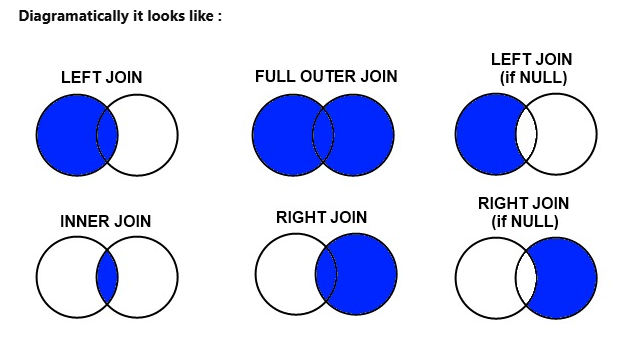

#### So why JOINs? Because subqueries/CTEs/temp tables are utilized by joining them to tables in your main query in various ways, so it is helpful to recall the different JOIN types.

## When working with SQL, it's common to encounter situations where you need to perform calculations or data transformations based on grouped or filtered data. 

#### Three powerful tools for handling such scenarios are: 

* Inline Subqueries

* Common Table Expressions (CTEs)

* Temporary (Temp) Tables

All of these approaches allow you to structure your queries in a way that breaks down complex operations into manageable steps, but they do so in slightly different ways.

## Subqueries 

An inline subquery is a query nested within another SQL query, typically within the SELECT, WHERE, or FROM clause. 

Inline subqueries allow you to perform calculations or filtering within the context of the outer query. 

They are particularly useful when you need to filter results based on aggregated values like maximum, minimum, or average.

Inline subqueries are powerful, but they can become less efficient when the same calculation needs to be repeated multiple times, as each repetition can slow down the query execution. 

Visit the [w3resource's SQLite Subqueries page](https://www.w3resource.com/sqlite/sqlite-subqueries.php) to learn more.



## Common Table Expressions (CTEs)

Common Table Expressions (CTEs)
A Common Table Expression (CTE), introduced by the WITH clause, is a named temporary result set that you can reference within your main query. 

CTEs improve the readability and maintainability of SQL code, especially for complex queries, by allowing you to break down operations into logical steps.

CTEs are often preferred for their clarity and efficiency, particularly when the same calculation or transformation needs to be referenced multiple times within a query. 

Visit the [SQLite Documentation's CTE page](https://www.sqlite.org/lang_with.html) to learn more.

## Temp Tables

In SQLite, temporary tables (or temp tables) are used to store data temporarily during the course of a session. 

These tables are very useful for intermediate results, complex queries, or storing temporary data without affecting the main schema of the database. 

The data in a temporary table is automatically deleted when the session ends or when the database connection is closed.

Temporary Tables Features:


*    `Temporary Scope`: Temporary tables only exist for the duration of the database session. Once the connection is closed, the temporary tables are dropped automatically.


*    `Session-Specific`: They are available only to the database connection that created them. Other connections cannot access the temporary tables.


*    `Prefix`: Temporary tables are created with the keyword TEMP or TEMPORARY, but TEMP is optional in SQLite. They are stored in memory by default, but you can configure them to be stored on disk.


*    `No Impact on Schema`: Temporary tables are separate from the permanent database schema, so they do not affect the structure or data of the main tables.

https://w3schools.tech/tutorial/sql/sql-temporary-tables

### All 3 of these features create temporary, "table-like" structures that can be referenced (and joined to) in your queries.

### Aside from the differences in `how` they are created, their main difference in execution is in the timing of their creation.

### Subqueries

- Are created/defined and executed in the same statement.

- Are defined `inline`, within your main query, and as part of that main query.

- Are only executed where defined, not reusable.

### CTEs

- Are created/defined at the `top` of the SQL statement.

- Are called, as a separate operation, each time that they are referenced.

- As such, are reusable.

- What this means, practically, is that if you are joining to a CTE multiple times in your SQL, it is separately called and executed each time you reference it.

### Temp Tables

- Are created/defined at the `top` of the SQL statement. 

- The temp table is created and written to memory when defined, and subsequent joins to the temp table are to the table structure in memory. 

- Temp tables can be very efficient, when your query is either complex, or you must call it several/many times in your SQL program, because it is only created once, then referenced as any other table.

- Temp tables can be memory-intensive, particularly if it holds a lot of data (either rows or columns, or both).

## Let's look at each one of these in detail. 

## Each will have their own Jupyter notebook.

## In order to show the differences between the three, we will execute the exact same queries with each.

#### We will be working with our abbreviated NYC Calls database, from Homework NB9, for each of the example notebooks.